%This is a test heading. Where do we go from here?

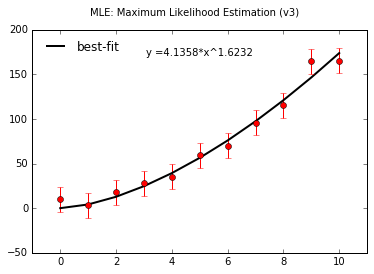

In [7]:
%matplotlib inline
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
from scipy.stats import chi2
import time
import matplotlib.pylab as plt
outfilepath = '/Users/Jatan/Google Drive/PHYS2010/'   #modify this path to your plot directory

#setting up x values
x=np.linspace(0, 10, 11)

#input data
data = [9.9078, 3.1797, 17.9771, 28.0620, 35.3188, 59.4874, 69.7478, 95.4985, 115.0069, 164.3853, 165.3513]
err_std  = [10 * np.ones(len(data))[i] for i in range(len(data))]   #for plotting error bars
err_large = [14 * np.ones(len(data))[i] for i in range(len(data))]

def neg_loglhood_lin_2d(params):
    m = params

    ymod = m*x
    log_lik_lin = -np.sum(stats.norm.logpdf(data, loc=ymod, scale=err_std) )
    return(log_lik_lin)

def neg_loglhood_parabolic(params):
    a = params

    ymod = a*pow(x, 2)
    log_lik_plaw = -np.sum(stats.norm.logpdf(data, loc=ymod, scale=err_std) )
    return(log_lik_plaw)

def neg_loglhood_plaw(params):
    a, b = params

    ymod = a*pow(x, b)
    log_lik_plaw = -np.sum(stats.norm.logpdf(data, loc=ymod, scale=err_std) )
    return(log_lik_plaw)

#initial parameter guesses    
init_params_2d = [1, 1]
init_params = [1,]

#minimize the log likelihood or equivalently maximize the likelihood
result_parabolic = minimize(neg_loglhood_parabolic, init_params, method='nelder-mead')
equation_parabolic = 'y =' + str(round(result_parabolic.x[0], 4)) + '*' + 'x^2' 

result_lin_2d = minimize(neg_loglhood_lin_2d, init_params, method='nelder-mead')
equation_lin_2d = 'y =' + str(round(result_lin_2d.x[0], 4)) + '*' + 'x'

result_plaw = minimize(neg_loglhood_plaw, init_params_2d, method='nelder-mead')
equation_plaw = 'y =' + str(round(result_plaw.x[0], 4)) + '*' + 'x^' + str(round(result_plaw.x[1], 4))

#print the results as a sanity check!
#print result_plaw.x

#plotting routine   #substitute _lin for _plaw to obtain plot for linear model
fig, ax = plt.subplots(1,1)
plt.plot(x, result_plaw.x[0]*pow(x, result_plaw.x[1]), lw=2, color='black', label = 'best-fit') #result_lin_2d.x[0]*x #result_parabolic.x[0]*pow(x,2) #result_plaw.x[0]*pow(x, result_plaw.x[1]
plt.errorbar(x, data, yerr=err_large, color='red', fmt='o')
plt.xlim(-1, 11)
plt.suptitle("MLE: Maximum Likelihood Estimation (v3)")
ax.text(0.5, 0.9, equation_plaw, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes) #equation_lin_2d #equation_parabolic 
plt.legend(loc='upper left', prop={'size':12}, frameon=False)
plt.savefig(outfilepath + 'powerlawfit.pdf')   #'linearfit.pdf' #'parabolicfit.pdf'
